Custom Potential
=================

While Mechanica provides an ever-growing inventory of built-in potentials, Mechanica also provides the ability to create and use custom potentials. 
This example demonstrates how to create a Pseudo-Gaussian potential directly in python and test it in a one-dimensional scenario. 

For details on the specifics of the Pseudo-Gaussian potential, see 

> Cotăescu, Ion I., Paul Grăvilă, and Marius Paulescu. "Pseudo-Gaussian oscillators." International Journal of Modern Physics C 19.10 (2008): 1607-1615.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/tjsego/mechanica-binder/HEAD?filepath=notebooks%2Fcustom_potential.ipynb)

Basic Setup
------------

Begin by initializing Mechanica with no-slip boundary conditions along ``x``, which will be the direction along which particles will be placed and tested in a one-dimensional scenario. 

In [1]:
import mechanica as mx
from math import exp, factorial

mx.init(cutoff=5, bc={'x': 'noslip'})

Particle Types
---------------

The test scenario considers an invisible, fixed source of a Pseudo-Gaussian potential at the center of the domain that displaces particles along the ``x``-direction. 
Create two particles types, 

1. A fixed, invisible type
2. A particle type that cannot move along the ``y``- and ``z``-directions. 

In [2]:
class WellType(mx.ParticleType):
    """A particle type to act as a fixed source of a Pseudo-Gaussian potential"""
    frozen = True
    style = {'visible': False}


class SmallType(mx.ParticleType):
    """A particle type that displaces in a fixed Pseudo-Gaussian potential"""
    radius = 0.1
    
    @classmethod
    def get(cls):
        result = super().get()
        result.frozen_y = result.frozen_z = True
        return result


well_type, small_type = WellType.get(), SmallType.get()

Potential Definition
---------------------

Generally, Mechanica can create custom potentials in python using at least a function that takes the distance between two particles as an argument and returns the value of the potential. Additionally, Mechanica can also use functions for the first and sixth derivatives of the potential, and approximates whichever of these two when they are not provided using finite difference. 

Create a python function for Mechanica to create a potential of the form, 

$ V \left( r \right) = \sum_{0 \leq k \leq s} \frac{\left( \lambda + k \right) \mu^k}{k!} r^{2k} \exp \left( - \mu r^2 \right) $

In [3]:
# Custom potential function parameters
lam, mu, s = -0.5, 1.0, 3


def f(r: float):
    """Pseudo-Gaussian potential evaluated at r"""
    return sum([(lam + k) / factorial(k) * mu ** k * r ** (2 * k) for k in range(s+1)]) * exp(-mu * r * r)

Custom Potential
-----------------

Create and verify a potential object using the custom potential function definition, give it a name, and apply it to the particle types of the test scenario. 

ymax:  0.9810875654220581 ymin: -0.5 yrange: 1.481087565422058
Ylim:  -0.6481087565422058 1.129196321964264


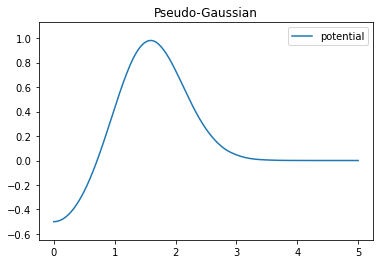

In [4]:
pot_c = mx.Potential.custom(min=0, max=5, f=f)
pot_c.name = "Pseudo-Gaussian"
mx.bind.types(p=pot_c, a=well_type, b=small_type)
pot_c.plot(min=0, max=5, potential=True, force=False)

Particle Construction
----------------------

Place a single well particle and the center of the domain, and small particles at regular intervals along the ``x``-axis. 

In [5]:
# Create particles
well_type(position=mx.Universe.center, velocity=mx.MxVector3f(0))
num_particles = 20
for i in range(num_particles):
    small_type(position=mx.MxVector3f((i+1)/(num_particles + 1) * mx.Universe.dim()[0], 
                                      mx.Universe.center[1], 
                                      mx.Universe.center[2]),
               velocity=mx.MxVector3f(0))

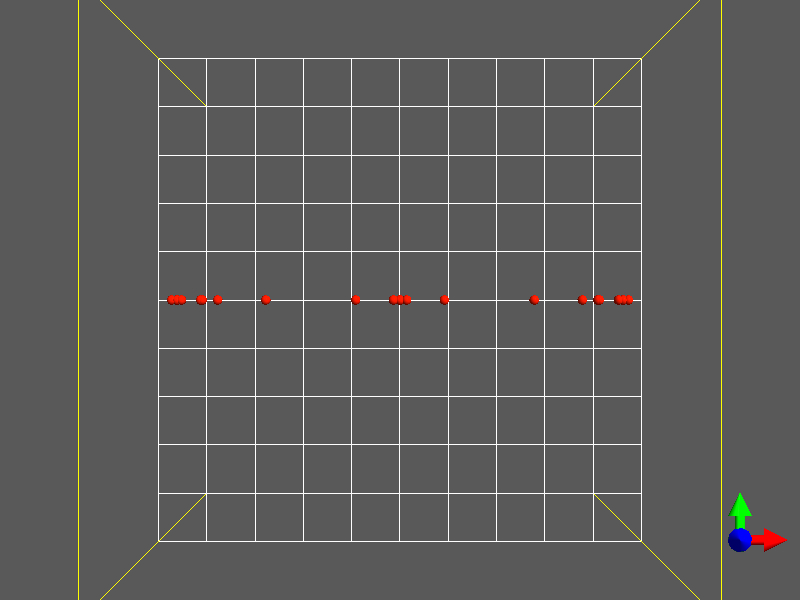

In [6]:
mx.system.cameraViewTop()
mx.show()